In [ ]:
import numpy as np

## Ex1.4

In [59]:
l = np.asarray([1, 2, -3])
p1 = np.asarray([3, 0, 1]).reshape(3, 1)
p2 = np.asarray([6, 0, 2]).reshape(3, 1)
p3 = np.asarray([1, 1, 2]).reshape(3, 1)
p4 = np.asarray([1, 1, 1]).reshape(3, 1)
p5 = np.asarray([110, -40, 10]).reshape(3, 1)
p6 = np.asarray([11, 4, 1]).reshape(3, 1)
combined = np.stack((p1, p2, p3, p4, p5, p6), axis=0)
l.T @ combined


array([[ 0],
       [ 0],
       [-3],
       [ 0],
       [ 0],
       [16]])

## Ex 1.5
The intersection of two lines is the cross product of the homogeneous coordinate definitions.

In [62]:
l0 = np.asarray([1, 1, -1]).reshape(3, 1)
l1 = np.asarray([-1, 1, -3]).reshape(3, 1)
np.cross(l0.T, l1.T)

array([[-2,  4,  2]])

## Ex 1.7

In [76]:
l = np.asarray([1 / (np.sqrt(2)), 1 / (np.sqrt(2)), -1]).reshape(3, 1)
p1 = np.asarray([0, 0, 1])
p2 = np.asarray([np.sqrt(2), np.sqrt(2), 1])
p3 = np.asarray([np.sqrt(2), np.sqrt(2), 4])
for i, p in enumerate([p1, p2, p3]):
    d = np.linalg.norm(l.T @ p) / (np.linalg.norm(p[-1]) * np.sqrt(l[0]**2.0 + l[1]**2.0))
    print(f"d{i + 1} is {d} ")

d1 is [1.] 
d2 is [1.] 
d3 is [0.5] 


## Implement transformations

In [22]:
import numpy as np
import matplotlib.pyplot as plt

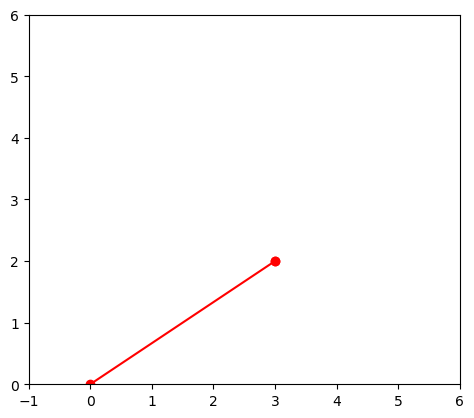

In [23]:
v = np.array([3,2])
fig, ax = plt.subplots()
ax.plot(*v, 'ro')
ax.set_xlim(-1, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.plot([0,v[0]], [0,v[1]], '-ro')

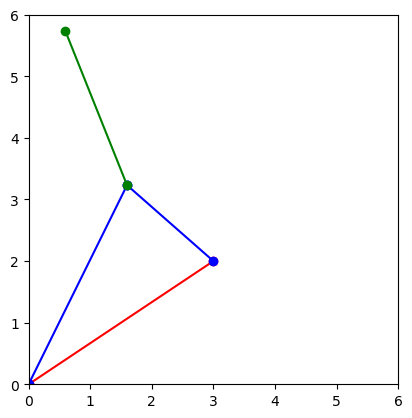

In [24]:
t = np.array([-1, 2.5])
angle = 30
theta = angle/180 * np.pi
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
v_r = R @ v
v_t = v_r + t
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.plot([0, v[0]], [0, v[1]], '-ro')
ax.plot([v[0], v_r[0]], [v[1], v_r[1]], '-bo')
ax.plot([0, v_r[0]], [0, v_r[1]], '-bo')
ax.plot([v_r[0], v_t[0]], [v_r[1], v_t[1]], '-go')

## Exercises

In [25]:
import cv2
cv2.__version__

'4.10.0'

## Ex1.11

In [26]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2
box = box3d(16)
box

array([[-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
        -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
         0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
         0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5

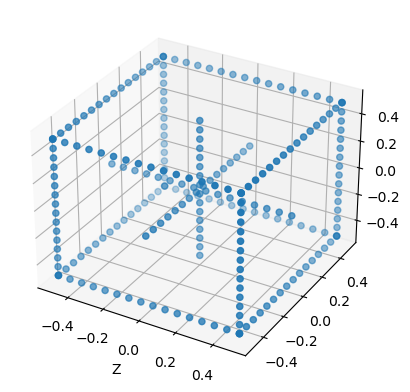

In [27]:
def plot_projections(x: np.array):
    '''
    Plots projections

    Args:
        x (np.array) homogeneous coordinate to be plotted

    ''' 
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X')
    ax.set_xlabel('Y')
    ax.set_xlabel('Z')
    ax.scatter(x[0], x[1], x[2])
plot_projections(box)

## Ex 1.12 Helper functions
* Pi that converts from homogeneous to inhomogeneous coordinates
* PiInv that converts from inhomogeneous to homogeneous coordinates.

In [36]:
def Pi(x: np.array):
    """
    Converts homogeneous to inhomogeneous coordinates
    Args:
        x (np.array) homogeneous coordinate

    Return:
        np.array converted inhomogeneous coordinate
    """
    
    return x[:-1] / x[-1]

#TODO make this work for ndim = 1
def Piinv(x: np.array):
    '''
    Converts inhomogeneous to homogeneous coordinates

    Args:
        x (np.array) inhomogeneous coordinate
    
    Return:
        np.array converted homogeneous coordinate
    ''' 
    if x.ndim == 1:
        return np.concatenate((x, np.ones(1)))
    return np.vstack((x, np.ones((1, x.shape[1]))))

In [37]:
testPi = Pi(np.asarray([5, 4, 3, 1]))
testOneDim = Piinv(np.asarray([2, 2, 1]))
testPiinv = Piinv(np.asarray([[12, 9, 3], [2, 2, 1]]))
testPi, testPiinv

(array([5., 4., 3.]),
 array([[12.,  9.,  3.],
        [ 2.,  2.,  1.],
        [ 1.,  1.,  1.]]))

## Ex 1.13 Camera projection

In [30]:
K = np.eye(3)
R = np.eye(3)
# Transpose shape (3,) gives the same shape, must be # (3, 1)
t = np.asarray([0, 0, 4]).reshape((3, 1))
result = K @ np.concatenate((R, t.reshape(3, 1)), axis=1)
result.shape, box.shape

((3, 4), (3, 240))

In [31]:
def projectpoints(K: np.array, R: np.array, t: np.array, Q: np.array):
    """
    Obtains projected 2D coordinates from world coordinates

    Args:
        K (np.array) intrinsics matrix
        R (np.array) extrinsic rotation matrix
        t (np.array) extrinsic translation matrix 
        Q (np.array) homogeneous input points in world coordinates

    Return:
        np.array projected 2D points
    """
    # Projection matrix = K[R t] Q
    extrinsics =  np.concatenate((R, t), axis=1)
    return K @ extrinsics @ Q

(array([[-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
         -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
          0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
          0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
         -0.5       , -0.5       , -0.5       , -0.5       ,  0.5       ,
          0.5       ,  0.5       ,  0.

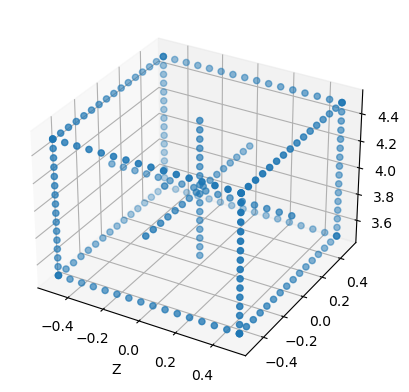

In [32]:
Q = Piinv(box)
result = projectpoints(K, R, t, Q)
result, plot_projections(result)

(array([[ 0.8660254,  0.       ,  0.5      ],
        [ 0.       ,  1.       ,  0.       ],
        [-0.5      ,  0.       ,  0.8660254]]),
 None)

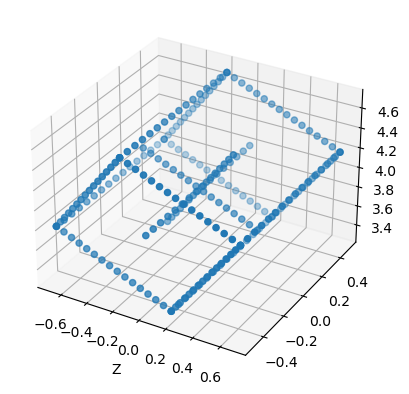

In [41]:
angle = 30
theta = angle / 180 * np.pi
R = np.asarray(
    [
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)],
    ]
)
result = projectpoints(K, R, t, Q)
R, plot_projections(result)

((2, 240), <matplotlib.collections.PathCollection at 0x7e11a55fd9c0>)

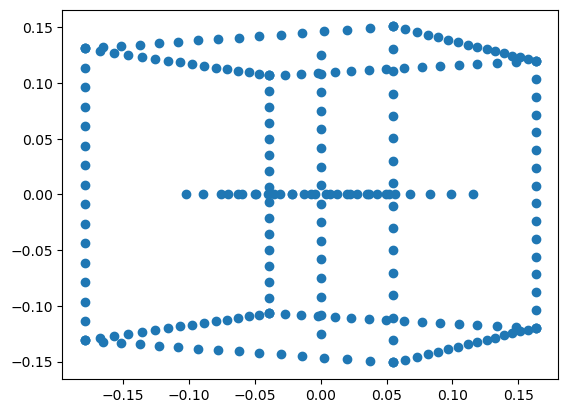

In [48]:
twodim = Pi(result)
fig = plt.figure()
# REMEMBER TO REMOVE THE HOMOGENEOUS
twodim.shape, plt.scatter(twodim[0], twodim[1])